## TBATS

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# ! pip install tbats

In [4]:
from tbats import BATS, TBATS

In [5]:
df = pd.read_csv('./data/serie-storiche-ecommerce-pulito-no-buchi-temporali.csv')
df.head()

,Unnamed: 0,data,new_index,totale,settore,Anno,Mese,Giorno,Mese (n°)
0,0,2014-01-01,NaN,0.0,Pesca,2014,Gennaio,1,1
1,1,2014-01-02,NaN,0.0,Pesca,2014,Gennaio,2,1
2,2,2014-01-03,NaN,0.0,Pesca,2014,Gennaio,3,1
3,3,2014-01-04,NaN,0.0,Pesca,2014,Gennaio,4,1
4,4,2014-01-05,NaN,0.0,Pesca,2014,Gennaio,5,1


In [6]:
df_pesca = df[df["settore"] == 'Pesca']
df_pesca.head()

,Unnamed: 0,data,new_index,totale,settore,Anno,Mese,Giorno,Mese (n°)
0,0,2014-01-01,NaN,0.0,Pesca,2014,Gennaio,1,1
1,1,2014-01-02,NaN,0.0,Pesca,2014,Gennaio,2,1
2,2,2014-01-03,NaN,0.0,Pesca,2014,Gennaio,3,1
3,3,2014-01-04,NaN,0.0,Pesca,2014,Gennaio,4,1
4,4,2014-01-05,NaN,0.0,Pesca,2014,Gennaio,5,1


In [7]:
df_pesca2 = df_pesca[['data', 'settore', 'totale', 'Anno', 'Mese', 'Giorno']]
df_pesca2.head()

,data,settore,totale,Anno,Mese,Giorno
0,2014-01-01,Pesca,0.0,2014,Gennaio,1
1,2014-01-02,Pesca,0.0,2014,Gennaio,2
2,2014-01-03,Pesca,0.0,2014,Gennaio,3
3,2014-01-04,Pesca,0.0,2014,Gennaio,4
4,2014-01-05,Pesca,0.0,2014,Gennaio,5


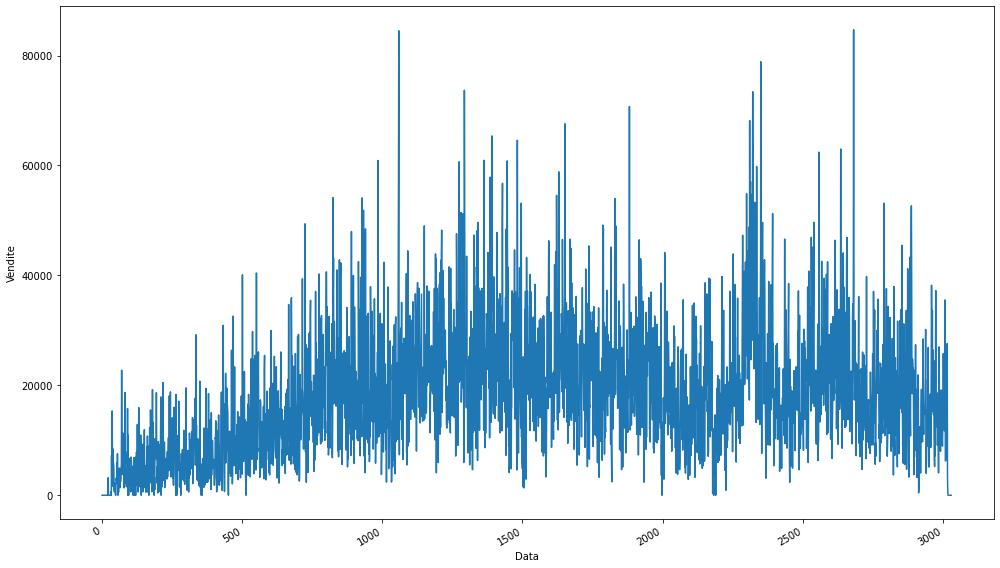

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(df_pesca2['totale'])
ax.set_xlabel('Data')
ax.set_ylabel('Vendite')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

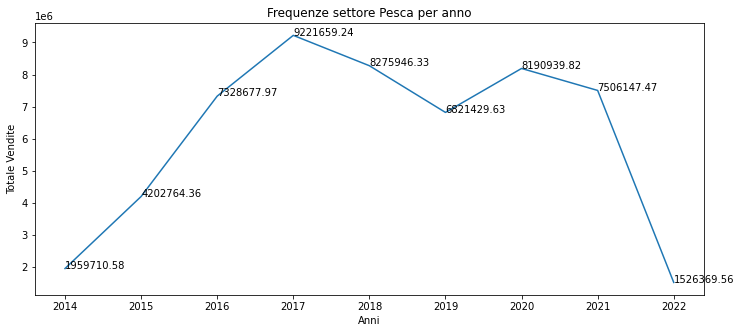

In [9]:
ls = ['Pesca']
for el in ls:
    # Costruiamo il dataset utile (freq annuali per ogni settore)
    dv = df[df['settore'] == el].groupby(['Anno'], as_index = False).sum()[['Anno', 'totale']]
    # Corpo della visualizzazione
    plt.figure(figsize=(12,5))
    x = dv['Anno'].to_list()
    y = dv['totale'].to_list()
    # Parte Estetica 
    plt.xticks(x)
    # plt.yticks(range(0,366,30))
    plt.xlabel('Anni')
    plt.ylabel('Totale Vendite')
    plt.plot(x, y)
    plt.title('Frequenze settore {} per anno'.format(el))
    # Mostra valori esatti per ogni osservazione
    for i,j in zip(x,y):
        plt.annotate(str(j),xy=(i,j))

In [10]:
df_pesca2.dtypes

data        object
settore     object
totale     float64
Anno         int64
Mese        object
Giorno       int64
dtype: object

In [11]:
df_pesca2['data'] = pd.to_datetime(df_pesca2['data'])

C:\Users\FC\AppData\Local\Temp\ipykernel_4384\2853349286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesca2['data'] = pd.to_datetime(df_pesca2['data'])


C:\Users\FC\AppData\Local\Temp\ipykernel_4384\2957743129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesca2['month'] = df_pesca2['data'].dt.month
C:\Users\FC\AppData\Local\Temp\ipykernel_4384\2957743129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pesca2['year'] = df_pesca2['data'].dt.year


<AxesSubplot:xlabel='month', ylabel='totale'>

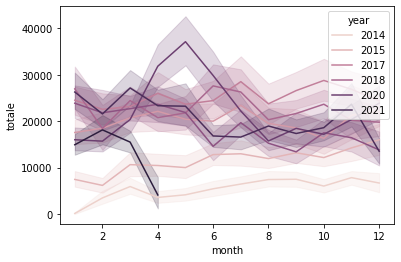

In [12]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

df_pesca2['month'] = df_pesca2['data'].dt.month
df_pesca2['year'] = df_pesca2['data'].dt.year
sns.lineplot(x=df_pesca2['month'],y=df_pesca2['totale'],hue=df_pesca2['year'])


In [13]:
y = df_pesca2['totale']
y_to_train = y.iloc[:(len(y)-365)]
y_to_test = y.iloc[(len(y)-365):] # last year for testing

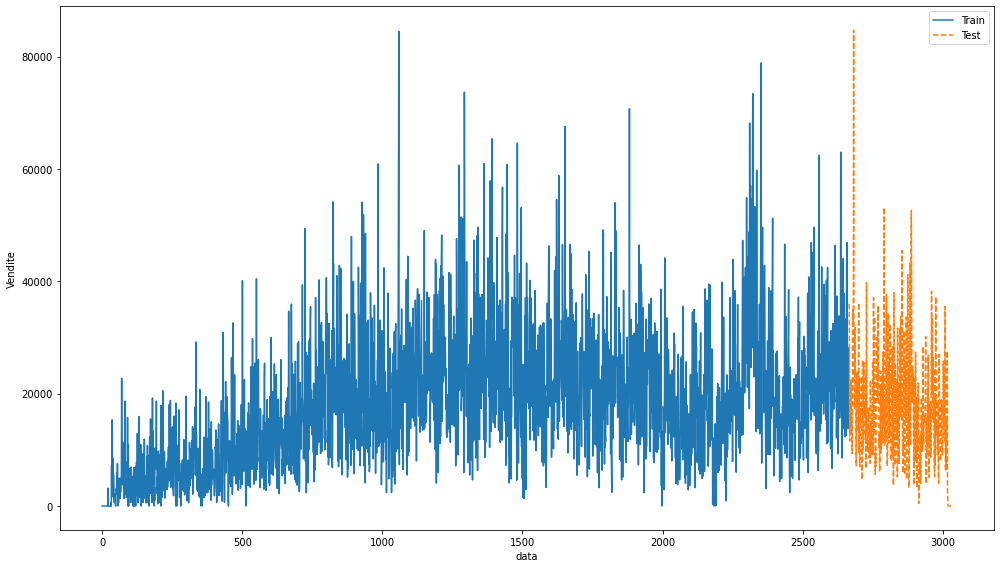

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(y_to_train, ls='-', label='Train')
ax.plot(y_to_test, ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

Before we implement our more complex BATS and TBATS models, it’s always a good idea to have a baseline model. That way, we can determine if our more complex forecasting methods are actually performant.

In [15]:
y_pred_baseline = y_to_train[-365:].values

In [16]:
# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(y_to_train) # Forecast 365 days ahead
y_forecast = model.forecast(steps=365)

You may have noticed that the yearly season length is not an integer. It equals 365.25 to account for leap years, a feature TBATS is able to handle.

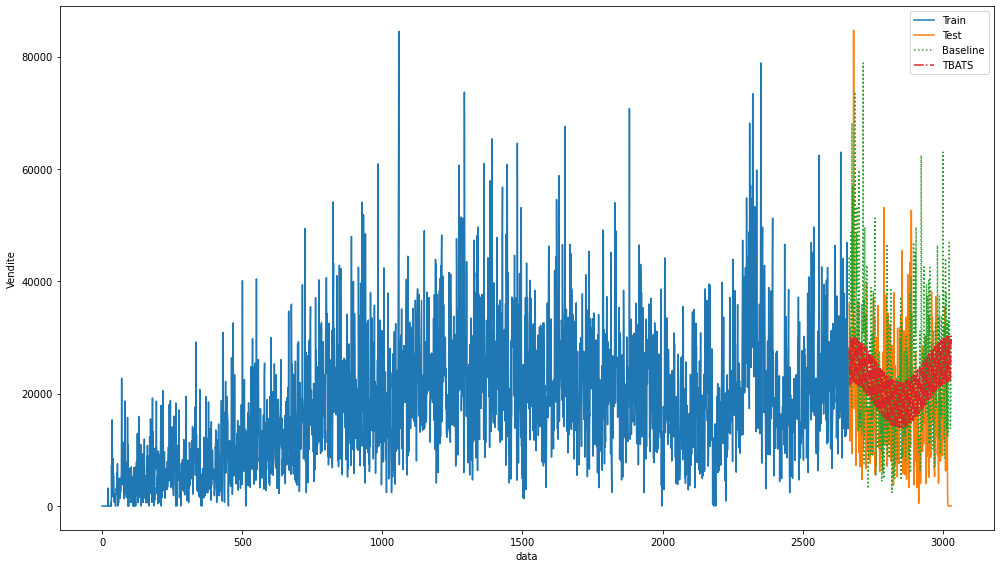

In [17]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(y_to_train, ls='-', label='Train')
ax.plot(y_to_test, ls='-', label='Test')
ax.plot(y_to_test.index, y_pred_baseline, ls=':', label='Baseline')
ax.plot(y_to_test.index, y_forecast, ls='-.', label='TBATS')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()